<a href="https://colab.research.google.com/github/EdWu-datascience/Machine-Learning-Algorithm/blob/main/Credit_Risk_Classification_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data scource**

https://www.kaggle.com/praveengovi/credit-risk-classification-dataset

This dataset holds customer transaction and demographic related data,it's posted on kaggle by Praveen.

# Data Description(customer_data)
label is 1, the customer is in high credit risk

label is 0, the customer is in low credit risk

# Data Description(payment_data)
id: customer id

OVD_ti:number of times overdue typei(three types of overdue)

OVD_sum:total overdue days

paynormal:number of times normal payment

prodcode: credit product code 

prodlimit: credit limit of product.

updatedate: account update date 

newbalance: current balance of product.

highestbalance:highest balance in history 

reportdate: date of recent payment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sidwuu","key":"9467c5281cb379293d7cc808a346a65e"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-31 12:40:41          11453  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6954  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2699  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1755  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d praveengovi/credit-risk-classification-dataset

  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 56.7MB/s]


In [ ]:
import zipfile
import pandas as pd
zip_file = zipfile.ZipFile('credit-risk-classification-dataset.zip')
customer_data = pd.read_csv(zip_file.open('customer_data.csv'))
payment_data = pd.read_csv(zip_file.open('payment_data.csv'))



In [ ]:
customer_data.head(5)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [29]:
#merage customer_data and payment_data two datasets
import pandas as pd
merge_data=pd.merge(customer_data,payment_data,how='left',on='id')

In [33]:
#some basic checks on merged dataset
print(merge_data.shape)
print(merge_data.columns.values)
merge_data.info()


(8250, 24)
['label' 'id' 'fea_1' 'fea_2' 'fea_3' 'fea_4' 'fea_5' 'fea_6' 'fea_7'
 'fea_8' 'fea_9' 'fea_10' 'fea_11' 'OVD_t1' 'OVD_t2' 'OVD_t3' 'OVD_sum'
 'pay_normal' 'prod_code' 'prod_limit' 'update_date' 'new_balance'
 'highest_balance' 'report_date']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            7222 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int

for columns like report_date,update_date,these columns has little impact on our classfication,so we're going to omit these columns in our classfication,besides,column prod_limit has too many null values(around 6000 out of 8250),so we need to do some process on this column

In [62]:
#process on column prod_limit
#we are going to replace the null value by the mean value in column prod_limit
import numpy as np
from sklearn.impute import SimpleImputer
nan_model=SimpleImputer(missing_values=np.nan,strategy='mean')
nan_result=pd.DataFrame(nan_model.fit_transform(merge_data[['prod_limit']]))

In [78]:
merge_data['prod_limit']=nan_result[0]
#then we need to delete the null values from dataset
merge_data.dropna(inplace=True)
merge_data.reset_index(inplace=True)
merge_data.head(5)


,index,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,9,10,60500.000000,31/01/2015,6657.6,18934.0,19/09/2015
1,1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,0,0,0,18,10,85789.702205,28/04/2009,153792.0,149387.0,10/08/2015
2,3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974,0,2,26,11906,6,10,85789.702205,17/05/2007,0.0,46371.0,12/07/2013
3,4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840,0,0,0,0,4,6,85789.702205,02/06/2016,15120.0,21500.0,19/04/2016
4,5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840,0,0,0,0,5,6,85789.702205,17/12/2015,5596.8,14500.0,19/04/2016


In [ ]:
merge_data.info()

In [94]:
#number of rows with label == 1
print(merge_data[merge_data['label']==1].shape[0])
#number of rows with label == 0
print(merge_data[merge_data['label']==0].shape[0])
merge_data.columns.values

992
5124


array(['index', 'label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4',
       'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11',
       'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code',
       'prod_limit', 'update_date', 'new_balance', 'highest_balance',
       'report_date'], dtype=object)

In [99]:
#create the train test dataset
X=merge_data[[]]
x_value=['fea_1', 'fea_2', 'fea_3', 'fea_4',
       'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11',
       'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code',
       'prod_limit','new_balance', 'highest_balance']
X=merge_data[x_value]
y=merge_data['label']
from sklearn.model_selection import train_test_split
#default 75% train data and 25% test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [101]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
knn.score(X_test,y_test)

0.8273381294964028

**different k value will lead to different accuracy of the model**

In [122]:
scores=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  scores.append(knn.score(X_test,y_test))


([<matplotlib.axis.XTick at 0x7fea13de0350>,
 <a list of 5 Text major ticklabel objects>)

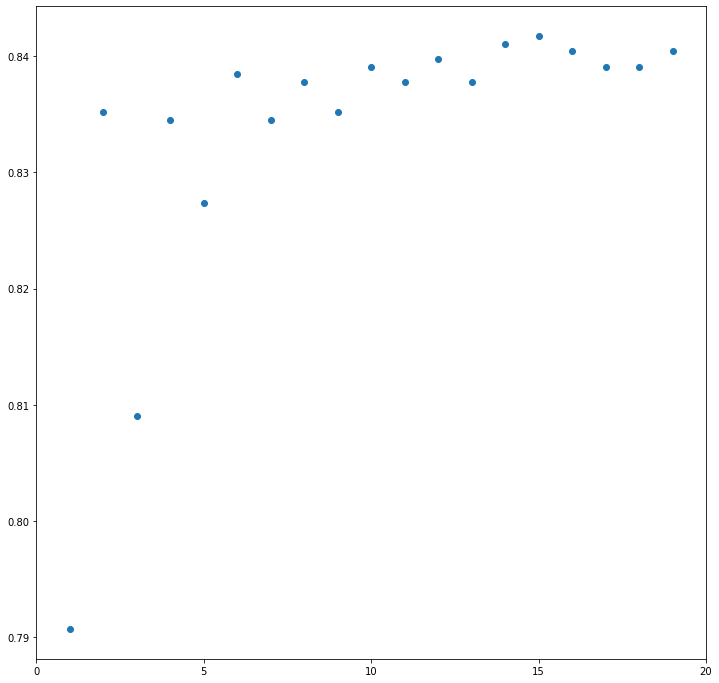

In [123]:
import matplotlib.pyplot as plt
k_range=range(1,20)
plt.figure(figsize=(12,12))
plt.xlabel='k'
plt.ylabel='score'
plt.title='the relationship bewteen k value and the accuracy of model'
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])

it seems better if we choose k equal 10

do a feature scaling check if it will make a difference to the result

In [115]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)


In [120]:
scores_scaled=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled,y_train)
  scores_scaled.append(knn.score(X_test_scaled,y_test))

([<matplotlib.axis.XTick at 0x7fea13bb0c50>,
 <a list of 5 Text major ticklabel objects>)

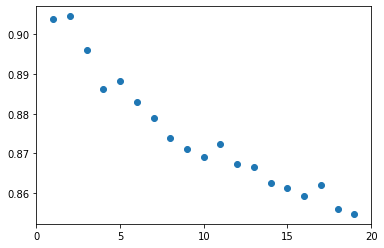

In [126]:
k_range=range(1,20)
plt.figure()
plt.xlabel='k'
plt.ylabel='score'
plt.title='the relationship bewteen k value and the accuracy of model'
plt.scatter(k_range,scores_scaled)
plt.xticks([0,5,10,15,20])

([<matplotlib.axis.XTick at 0x7fea13811310>,
 <a list of 5 Text major ticklabel objects>)

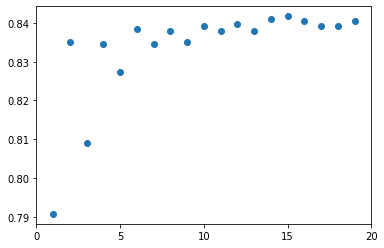

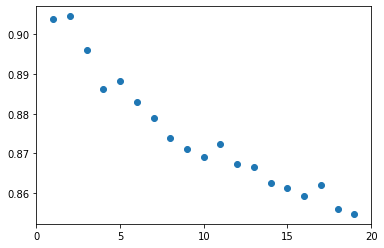

In [132]:
plt.subplots()
k_range=range(1,20)
#plt.figure()
plt.xlabel='k'
plt.ylabel='score'
plt.title='the relationship bewteen k value and the accuracy of model'
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])
plt.subplots(1)
#plt.figure()
k_range=range(1,20)
plt.xlabel='k'
plt.ylabel='score_scaled'
plt.title='the relationship bewteen k value and the accuracy of model'
plt.scatter(k_range,scores_scaled)
plt.xticks([0,5,10,15,20])
